### Imports & Definitions

In [29]:
import sys
sys.path.append("../../utils")
from definitions import *

### Try to calculate confidence intervals

In [20]:
import scipy.stats as st
import numpy as np


fb_data = [10, 11, 10, 14, 16, 24, 10, 6, 8, 10, 11, 27, 28, 21, 13, 10, 6, 7, 8, 10]
l, r = st.t.interval(
    0.95, len(fb_data) - 1, loc=np.mean(fb_data), scale=st.sem(fb_data)
)

In [25]:
def get_confidence_interval(samples, alpha):
    return st.t.interval(
        alpha, len(samples) - 1, loc=np.mean(samples), scale=st.sem(samples)
    )

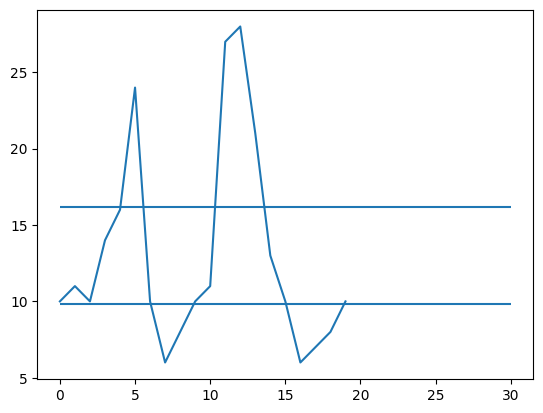

In [21]:
from matplotlib import pyplot as plt


plt.plot(np.arange(len(fb_data)), fb_data)
plt.hlines([l, r], xmin=0, xmax=30)
plt.show()

### View rummlu metric

In [33]:
rummlu = load_from_disk(DATASETS_DIR_PATH.joinpath("rummlu/mera/public_test").as_posix())

In [38]:
rummlu_answers = [x["outputs"] for x in rummlu]

In [58]:
with open(METRICS_DIR_PATH.joinpath("rummlu/mera/public_test/learnt/answers.jsonl"), "r") as f:
    rummlu_lora_1 = json.load(f)

In [59]:
rummlu_lora_1_answers = [x["answer"] for x in rummlu_lora_1]

In [60]:
def print_mean_and_interval(n, k):
    z = 1.96
    p = k / n
    return p, z * np.sqrt(p * (1 - p) / n)

In [61]:
n = len(rummlu_answers)
k = sum(np.array(rummlu_answers) == np.array(rummlu_lora_1_answers))
z = 1.96
p = k / n
p, z * np.sqrt(p * (1 - p) / n)

(0.29672082128974386, 0.008938786334366317)

In [42]:
len(rummlu_answers), sum(np.array(rummlu_answers) == np.array(rummlu_lora_1_answers))

(10033, 2985)

In [43]:
with open(METRICS_DIR_PATH.joinpath("rummlu/mera/public_test/llama-2-7b/answers.jsonl"), "r") as f:
    rummlu_llama = json.load(f)
rummlu_llama_answers = [x["answer"] for x in rummlu_llama]
len(rummlu_answers), sum(np.array(rummlu_answers) == np.array(rummlu_llama_answers))

(10033, 3021)

In [46]:
print_mean_and_interval(len(rummlu_answers), sum(np.array(rummlu_answers) == np.array(rummlu_llama_answers)))

(0.30110634904814115, 0.008976482102863302)

### View ruopenbookqa metric

In [48]:
ruopenbookqa = load_from_disk(DATASETS_DIR_PATH.joinpath("ruopenbookqa/mera/train").as_posix())
ruopenbookqa_answers = [x["outputs"] for x in ruopenbookqa]

In [54]:
with open(METRICS_DIR_PATH.joinpath("ruopenbookqa/mera/train/llama-2-7b/answers.jsonl"), "r") as f:
    ruopenbookqa_llama = json.load(f)
ruopenbookqa_llama_answers = [x["answer"] for x in ruopenbookqa_llama]
print_mean_and_interval(len(ruopenbookqa_answers), sum(np.array(ruopenbookqa_answers) == np.array(ruopenbookqa_llama_answers)))

(0.262617621899059, 0.017837834385961218)

In [57]:
with open(METRICS_DIR_PATH.joinpath("ruopenbookqa/mera/train/learnt/answers.jsonl"), "r") as f:
    ruopenbookqa_lora_1 = json.load(f)
ruopenbookqa_lora_1_answers = [x["answer"] for x in ruopenbookqa_lora_1]
print_mean_and_interval(len(ruopenbookqa_answers), sum(np.array(ruopenbookqa_answers) == np.array(ruopenbookqa_lora_1_answers)))

(0.2831479897348161, 0.018262293280431018)

### View assessors metric

In [71]:
with open(DATASETS_DIR_PATH.joinpath("diplomas_asessors_questions/mcs_df_human_filled_processed.json"), "r") as f:
    assessors = json.load(f)
assessors_answers = [x["outputs"] for x in assessors]

In [87]:
with open(METRICS_DIR_PATH.joinpath("diplomas_asessors_questions/lora_v1_correct_run_abstract_appended/llama-2-7b/answers_appended.jsons"), "r") as f:
    assessors_lora_v1_abstract = [json.loads(x) for x in f.readlines()]
assessors_lora_v1_abstract_answers = [x["answer"] for x in assessors_lora_v1_abstract]

In [88]:
print_mean_and_interval(len(assessors_answers), sum(np.array(assessors_answers) == np.array(assessors_lora_v1_abstract_answers)))

(0.3142857142857143, 0.10875293099498513)

In [89]:
sum(np.array(assessors_answers) == np.array(assessors_lora_v1_abstract_answers))

22

In [83]:
with open(METRICS_DIR_PATH.joinpath("diplomas_asessors_questions/lora_v1_correct_run_diploma_appended/llama-2-7b/answers_appended.jsons"), "r") as f:
    assessors_lora_v1_diploma = [json.loads(x) for x in f.readlines()]
assessors_lora_v1_diploma_answers = [x["answer"] for x in assessors_lora_v1_diploma]
print_mean_and_interval(len(assessors_answers), sum(np.array(assessors_answers) == np.array(assessors_lora_v1_diploma_answers)))

(0.3142857142857143, 0.10875293099498513)

In [85]:
sum(np.array(assessors_answers) == np.array(assessors_lora_v1_diploma_answers))

22

In [91]:
with open(METRICS_DIR_PATH.joinpath("diplomas_asessors_questions/lora_v1_correct_run_raw_model_v2_appended/llama-2-7b/answers_appended.jsons"), "r") as f:
    assessors_lora_v1_begin = [json.loads(x) for x in f.readlines()]
assessors_lora_v1_begin_answers = [x["answer"] for x in assessors_lora_v1_begin]
print_mean_and_interval(len(assessors_answers), sum(np.array(assessors_answers) == np.array(assessors_lora_v1_begin_answers)))

(0.24285714285714285, 0.10045496503408878)

In [92]:
with open(METRICS_DIR_PATH.joinpath("diplomas_asessors_questions/lora_v1_correct_run_learnt_appended/llama-2-7b/answers_appended.jsons"), "r") as f:
    assessors_lora_v1_begin = [json.loads(x) for x in f.readlines()]
assessors_lora_v1_begin_answers = [x["answer"] for x in assessors_lora_v1_begin]
print_mean_and_interval(len(assessors_answers), sum(np.array(assessors_answers) == np.array(assessors_lora_v1_begin_answers)))

(0.35714285714285715, 0.11224972160321824)

In [95]:
with open(METRICS_DIR_PATH.joinpath("diplomas_asessors_questions/abstract/llama-2-7b/answers.jsonl"), "r") as f:
    assessors_lora_v1_begin = json.load(f) # [json.loads(x) for x in f.readlines()]
assessors_lora_v1_begin_answers = [x["answer"] for x in assessors_lora_v1_begin]
print_mean_and_interval(len(assessors_answers), sum(np.array(assessors_answers) == np.array(assessors_lora_v1_begin_answers)))

(0.6142857142857143, 0.11403157457476415)

In [102]:
with open(METRICS_DIR_PATH.joinpath("diplomas_asessors_questions/diploma_appended/llama-2-7b/answers_appended.jsons"), "r") as f:
    assessors_lora_v1_begin = [json.loads(x) for x in f.readlines()]
with open(METRICS_DIR_PATH.joinpath("diplomas_asessors_questions/raw_diploma_appended/llama-2-7b/answers_appended.jsons"), "r") as f:
    assessors_lora_v1_begin_2 = [json.loads(x) for x in f.readlines()]
assessors_lora_v1_begin_2 = assessors_lora_v1_begin + assessors_lora_v1_begin_2[22:]
assessors_lora_v1_begin_answers = [x["answer"] for x in assessors_lora_v1_begin_2]
print_mean_and_interval(len(assessors_answers), sum(np.array(assessors_answers) == np.array(assessors_lora_v1_begin_answers)))

(0.17142857142857143, 0.08829042983245693)

In [106]:
with open(METRICS_DIR_PATH.joinpath("diplomas_asessors_questions/raw_model_v2_appended/llama-2-7b/answers_appended.jsons"), "r") as f:
    assessors_lora_v1_begin = [json.loads(x) for x in f.readlines()]
assessors_lora_v1_begin_answers = [x["answer"] for x in assessors_lora_v1_begin]
print_mean_and_interval(len(assessors_answers), sum(np.array(assessors_answers) == np.array(assessors_lora_v1_begin_answers)))

(0.35714285714285715, 0.11224972160321824)

In [108]:
27 / 70, 26 / 70, 28 / 70

(0.38571428571428573, 0.37142857142857144, 0.4)

In [111]:
25 / 70, 26 / 70, 24 / 70

(0.35714285714285715, 0.37142857142857144, 0.34285714285714286)

In [107]:
70 * 0.39

27.3

In [109]:
print_mean_and_interval(70, 27)

(0.38571428571428573, 0.11403157457476416)

In [112]:
print_mean_and_interval(70, 25)

(0.35714285714285715, 0.11224972160321824)